Recordemos que el objetivo del aprendizaje estadístico es encontrar una función que asigne a un vector de características, la etiqueta correspondiente:

$$y_i = f(x_i)$$

A la función $f$ le llamamos **modelo**. 

También, a las componentes del vector de características se les llama **predictores** y a la etiqueta se le llama respuesta.

Buscamos entonces un modelo que permita *estimar* la respuesta en términos de los *predictores*-  

### Regresión lineal simple

Características:

* Una sola componente en el vector de características (un solo predictor)
* El modelo es lineal: $$y_i = \alpha_0+\alpha_1x_i$$

Como ejemplo de aplicación, exploramos los siguientes datos:

In [ ]:
#lectura de datos
grillos <- read.csv("grillos.csv")

exam <- read.csv("exam_dat.csv")

brain <- read.csv("brain_weight.csv")

La exploración de los datos permitió darnos una idea de que el modelo lineal es *válido*: 

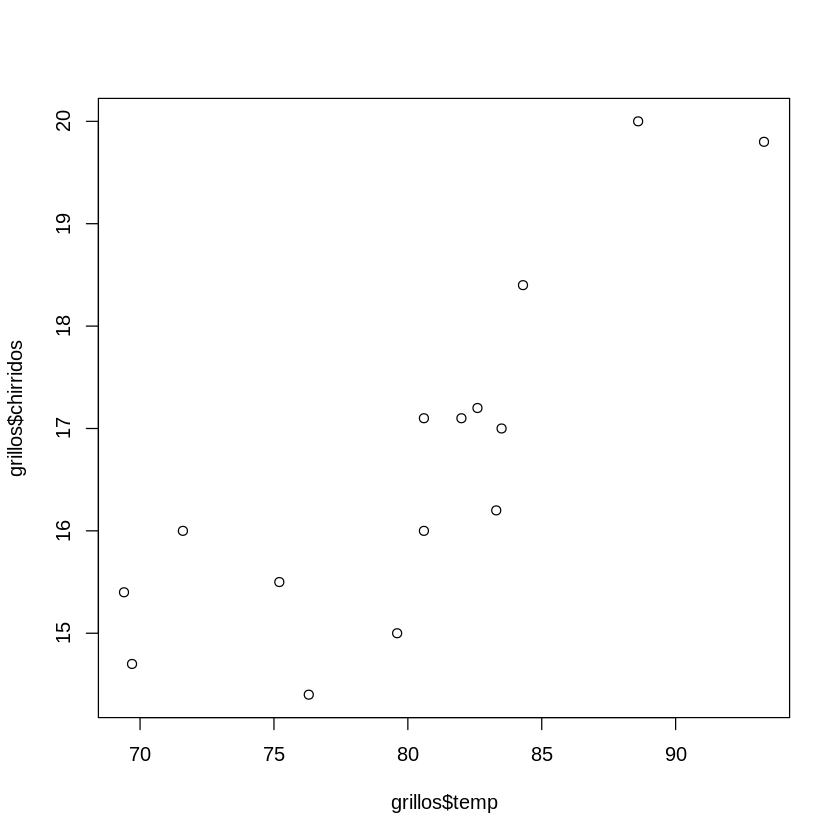

In [ ]:
plot(grillos$temp, grillos$chirridos)

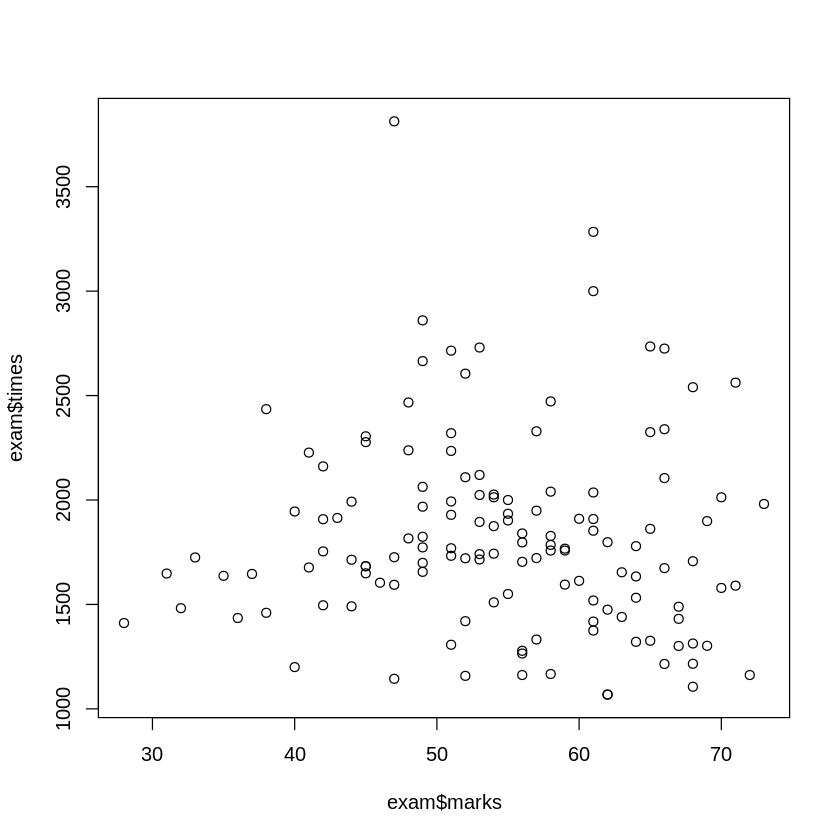

In [ ]:
plot(exam$marks, exam$times)

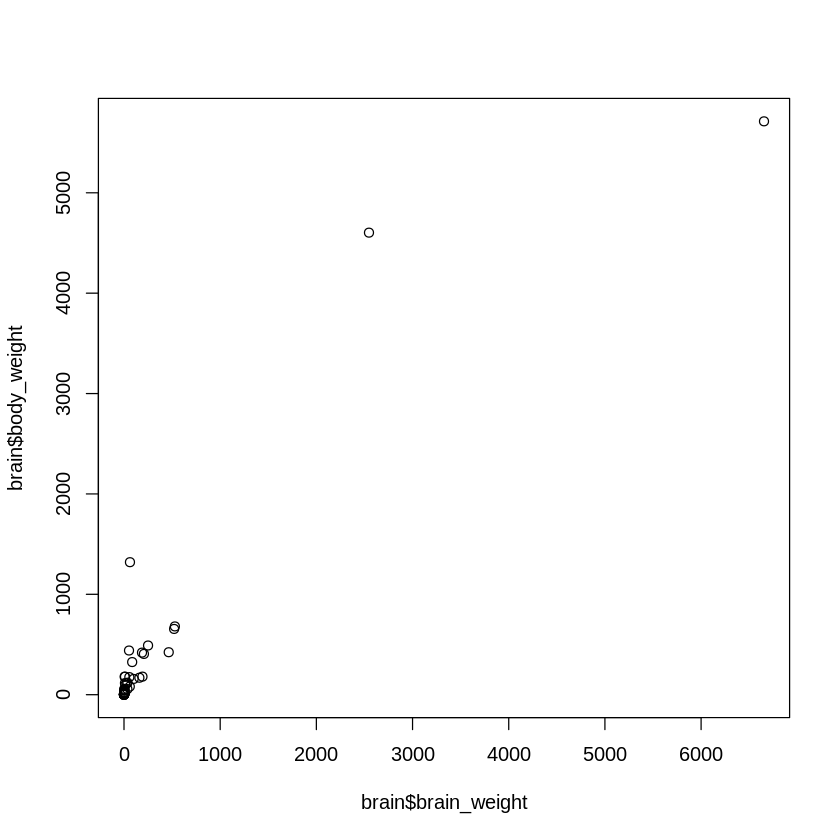

In [ ]:
plot(brain$brain_weight, brain$body_weight)

In [ ]:
cor(grillos$temp, grillos$chirridos) #correlación positiva y alta

cor(exam$marks, exam$times)

cor(brain$brain_weight, brain$body_weight)

[1] 0.8351438

[1] -0.05713813

[1] 0.9341638

In [ ]:
#ajustamos el modelo lineal por medio de R 
# "ajustar" significa determinar el valor de los 
#parámetros del modelo (pendiente e intersección)
r <- lm(grillos$chirridos ~ grillos$temp)
summary(r)


Call:
lm(formula = grillos$chirridos ~ grillos$temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56009 -0.57930  0.03129  0.59020  1.53259 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.30914    3.10858  -0.099 0.922300    
grillos$temp  0.21192    0.03871   5.475 0.000107 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9715 on 13 degrees of freedom
Multiple R-squared:  0.6975,	Adjusted R-squared:  0.6742 
F-statistic: 29.97 on 1 and 13 DF,  p-value: 0.0001067


In [ ]:
s <- lm(exam$times ~ exam$marks)
summary(s)


Call:
lm(formula = exam$times ~ exam$marks)

Residuals:
    Min      1Q  Median      3Q     Max 
-735.61 -297.65  -73.07  199.59 1968.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1971.154    227.675   8.658 1.46e-14 ***
exam$marks    -2.702      4.110  -0.658    0.512    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 465.1 on 132 degrees of freedom
Multiple R-squared:  0.003265,	Adjusted R-squared:  -0.004286 
F-statistic: 0.4324 on 1 and 132 DF,  p-value: 0.512


In [ ]:
t <- lm(brain$body_weight ~ brain$brain_weight)
summary(t)


Call:
lm(formula = brain$body_weight ~ brain$brain_weight)

Residuals:
    Min      1Q  Median      3Q     Max 
-810.07  -88.52  -79.64  -13.02 2050.33 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        91.00440   43.55258    2.09   0.0409 *  
brain$brain_weight  0.96650    0.04766   20.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 334.7 on 60 degrees of freedom
Multiple R-squared:  0.8727,	Adjusted R-squared:  0.8705 
F-statistic: 411.2 on 1 and 60 DF,  p-value: < 2.2e-16


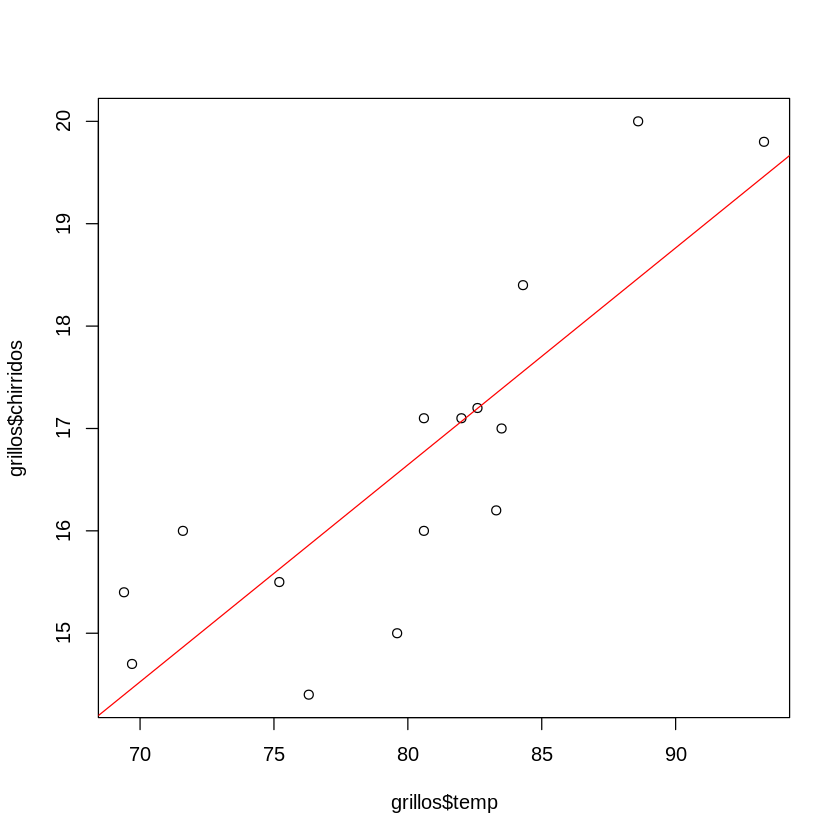

In [ ]:
#verificamos gráficamente la calidad del ajuste del modelo
plot(grillos$temp, grillos$chirridos)
abline(r, col="red")

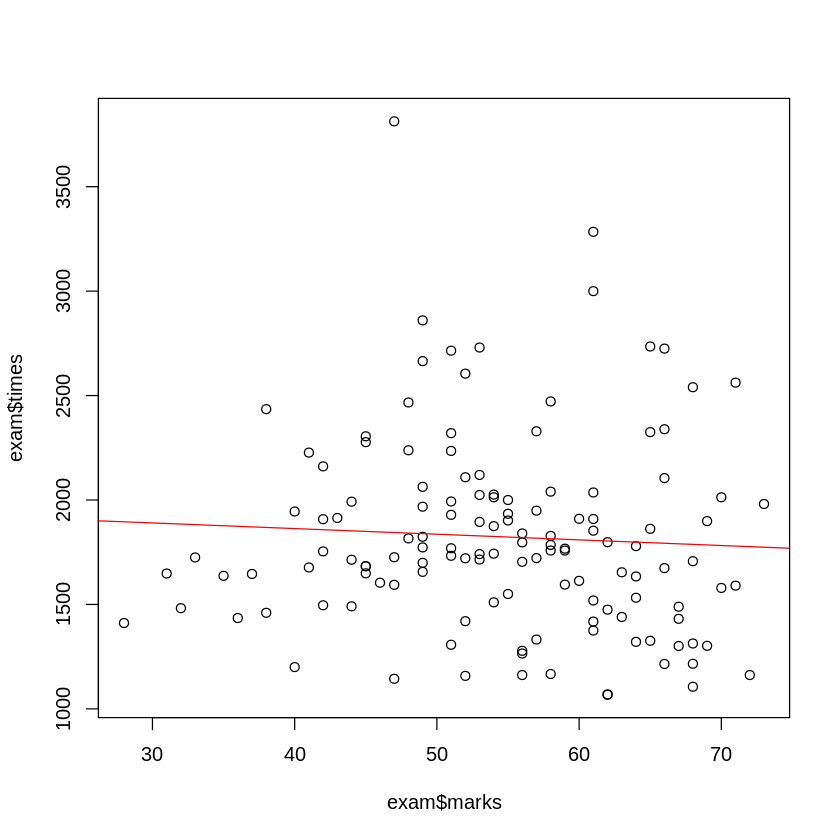

In [ ]:
plot(exam$marks, exam$times)
abline(s, col="red")

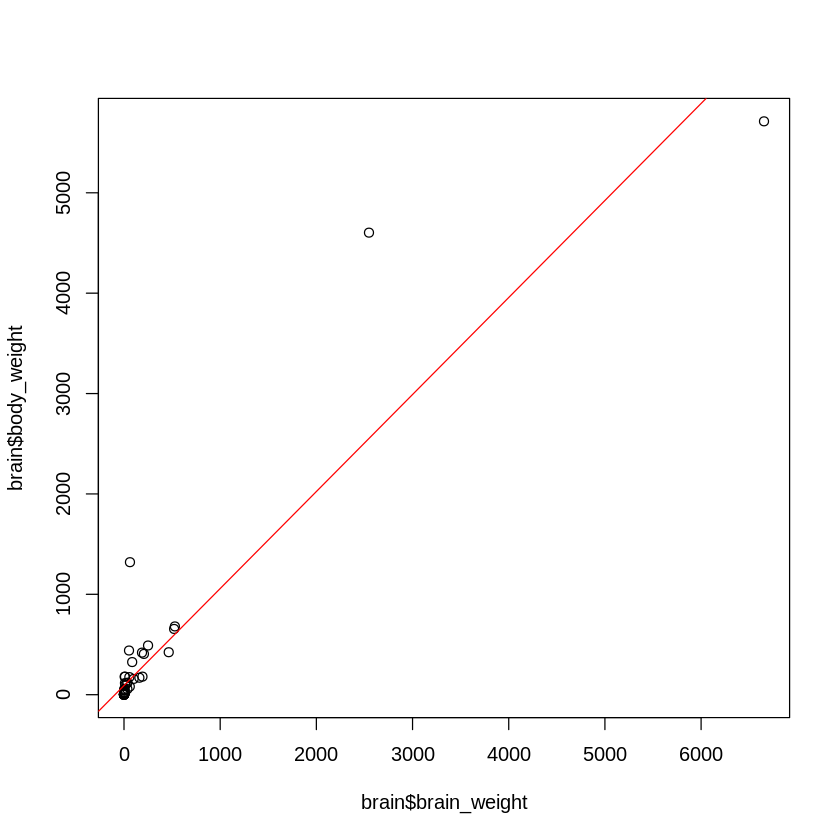

In [ ]:
plot(brain$brain_weight, brain$body_weight)
abline(t, col="red")

### El modelo lineal no es adecuado para algunos conjuntos de datos.

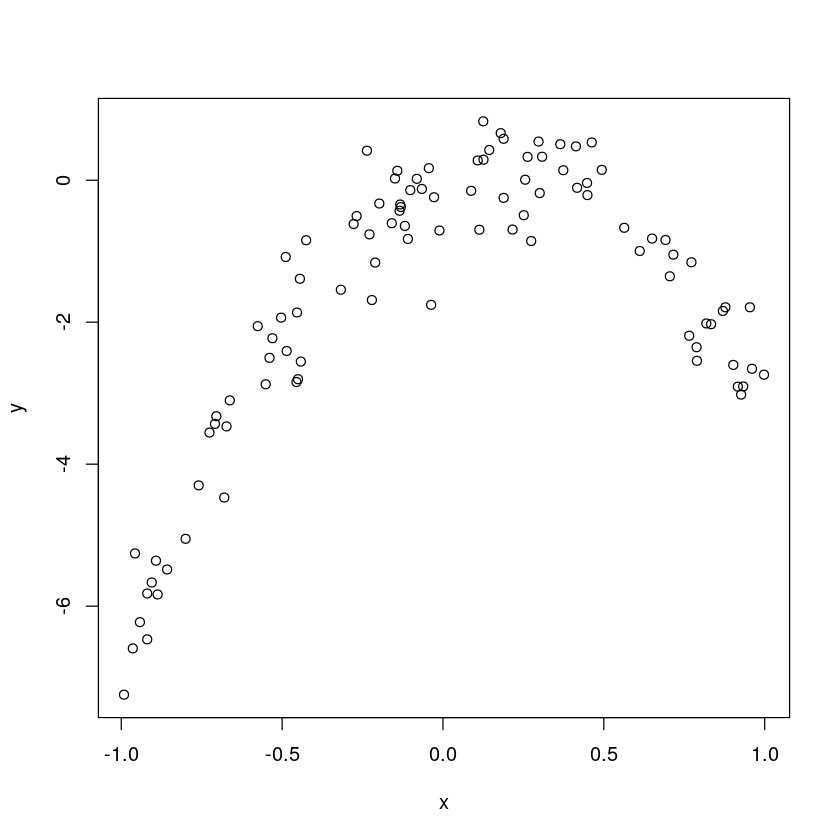

In [ ]:
x <- 2*runif(100)-1
y <- 2*x-5*x^2+0.5*rnorm(100)

plot(x,y)

In [ ]:
cor(x,y)

[1] 0.5259844

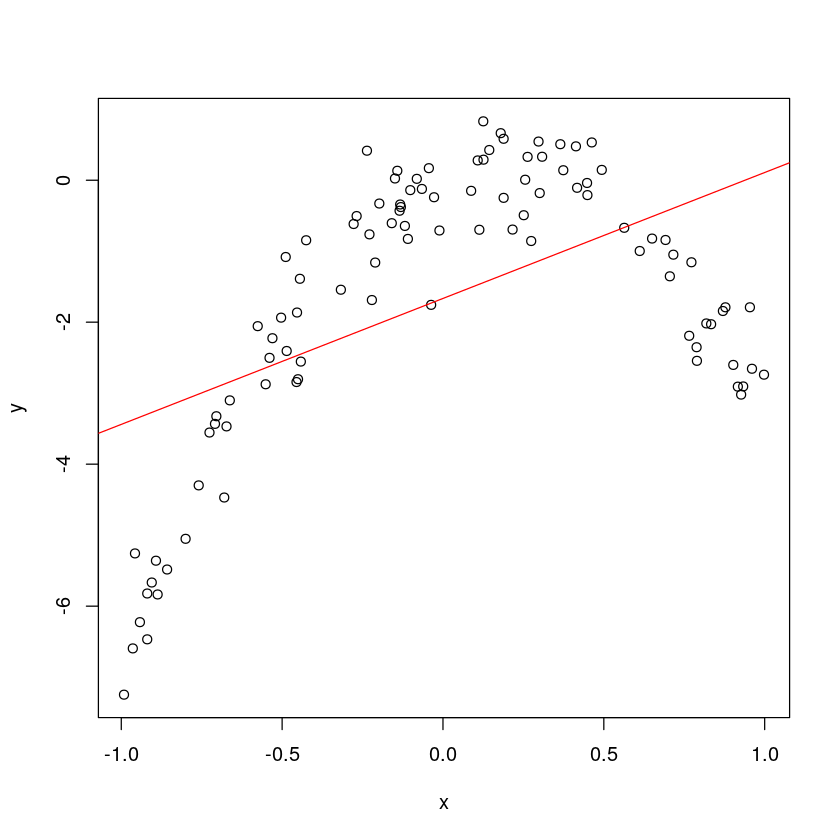

In [ ]:
r <- lm(y~x)
plot(x,y)
abline(r,col="red")

Para estos datos debemos buscar un modelo diferente (cuadrático en lugar de lineal)

### Para otros conjuntos, hay independencia entre las variables


Existen otros conjuntos de datos en los que el **predictor** ($x$) y la **respuesta** ($y$) son **independientes**

In [ ]:
examen <- read.csv("exam_dat.csv")
attach(examen)
head(examen)

,X,marks,times
,<int>,<int>,<int>
1,1,49,2860
2,2,49,2063
3,3,70,2013
4,4,55,2000
5,5,52,1420
6,6,55,1934


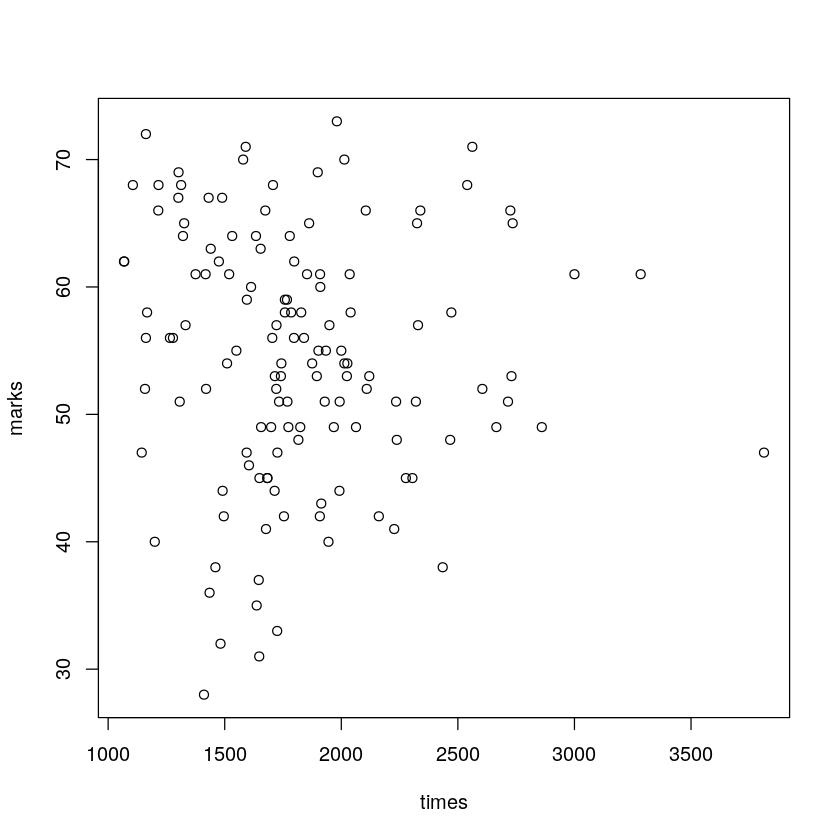

In [ ]:
plot(times, marks)

In [ ]:
cor(marks, times)

[1] -0.05713813

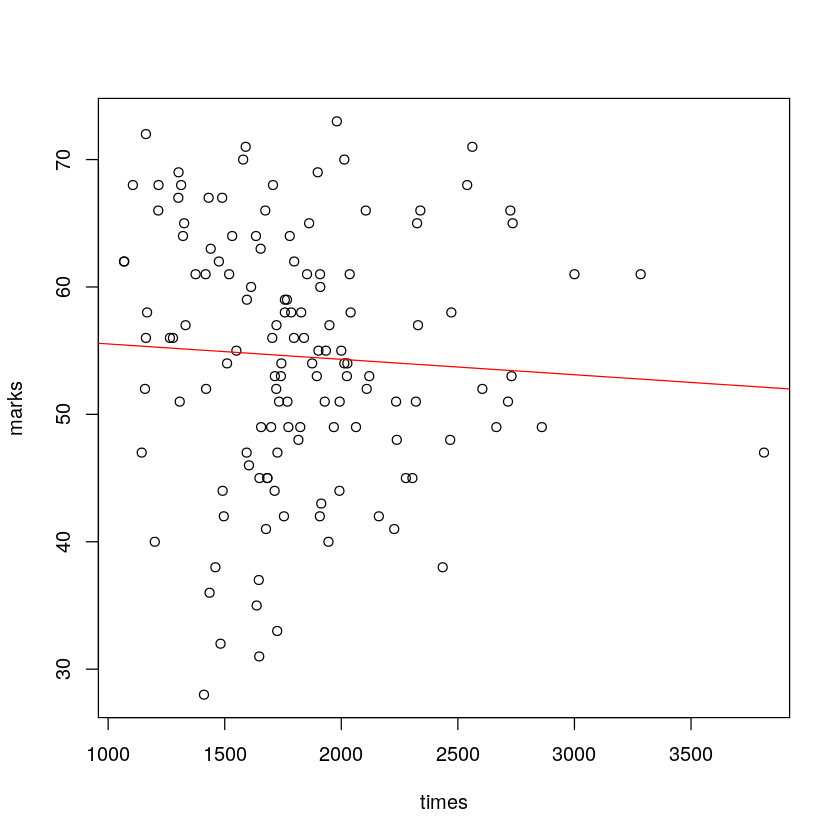

In [ ]:
r <- lm(marks ~ times)
plot(times, marks)
abline(r, col="red")

¿En qué nos basamos para juzgar la calidad del ajuste del modelo?















## Residuos

Para verificar la calidad del ajuste del modelo lineal (y en general de cualquier modelo que ajustemos) podemos revisar los residuos o errores de ajuste (la diferencia entre el valor de la observación y el predicho por el modelo)

Sea $\widehat{y_i}$ el valor predicho por el modelo para $x_i$:
$$\widehat{y_i} = \alpha_0+\alpha_1x_i$$

El residuo (o error de predicción), $e_i$ es:

$$e_i = y_i - \widehat{y_i}$$


In [ ]:
# evaluamos los residuos para los datos de los grillos
r <- lm(chirridos~temp)

summary(r)


Call:
lm(formula = chirridos ~ temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56009 -0.57930  0.03129  0.59020  1.53259 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.30914    3.10858  -0.099 0.922300    
temp         0.21192    0.03871   5.475 0.000107 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9715 on 13 degrees of freedom
Multiple R-squared:  0.6975,	Adjusted R-squared:  0.6742 
F-statistic: 29.97 on 1 and 13 DF,  p-value: 0.0001067


In [ ]:
r$coefficients

(Intercept)        temp 
 -0.3091419   0.2119250

In [ ]:
# y = a0+a1*x
grillos$y_pred <- r$coefficients[1]+r$coefficients[2]*temp
grillos

chirridos,temp,y_pred
<dbl>,<dbl>,<dbl>
20.0,88.6,18.46741
16.0,71.6,14.86469
19.8,93.3,19.46346
18.4,84.3,17.55613
17.1,80.6,16.77201
15.5,75.2,15.62762
14.7,69.7,14.46203
17.1,82.0,17.06871
15.4,69.4,14.39845


In [ ]:
#error de predicción o residuo
e <- grillos$chirridos-grillos$y_pred
summary(e)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.56009 -0.57930  0.03129  0.00000  0.59020  1.53259 

### ¿Cómo cuantificamos la calidad del ajuste a partir de los residuos?

¿Promedio?

$$E_1(\alpha_0, \alpha_1) = \frac{\sum_{i=1}^N e_i}{N}$$

In [ ]:
mean(e) # ¿es una medida adecuada para evaluar la calidad del ajuste?

[1] -2.486943e-15

Mejor algo como lo siguiente:

$$E_2(\alpha_0, \alpha_1) = \frac{\sum_{i=1}^N |e_i|}{N}$$

In [ ]:
#mejor algo como lo siguiente
mean(abs(e))

[1] 0.7268334

Todavía mejor:

$$E_3(\alpha_0, \alpha_1) = \frac{\sum_{i=1}^N e_i^2}{N}$$

In [ ]:
mean(e^2)

[1] 0.8180004

**¿por qué mejor?**


Porque nos permite hacer una estimación de los mejores valores de $\alpha_0$ y $\alpha_1$ por medio de optimización (podemos derivar, igualar a cero y despejar).

La función se denomina **suma de diferencias al cuadrado** 
$$SSD(\alpha_0, \alpha_1) = \sum_{i=1}^N e_i^2 = \sum_{i=1}^N [y_i-(\alpha_0+\alpha_1x_i)]^2$$

Depende de los parámetros de la recta: $\alpha_0, \alpha_1.$

Debemos elegir los valores de esos parámetros que minimicen la $SSD$, y eso lo hacemos mediante principios básicos de cálculo.

Por ejemplo, considerando $\alpha_0$ 

\begin{align}
    \frac{\partial SSD(\alpha_0, \alpha_1)}{\partial \alpha_0} &= \frac{\partial}{\partial \alpha_0}\sum_{i=1}^N e_i^2\\
     &= \frac{\partial}{\partial \alpha_0}\sum_{i=1}^N [y_i-(\alpha_0+\alpha_1x_i)]^2\\
     &= \sum_{i=1}^N \frac{\partial}{\partial \alpha_0} [y_i-\alpha_0-\alpha_1x_i]^2\\
     &= \sum_{i=1}^N 2[y_i-\alpha_0-\alpha_1x_i](-1)\\
     &\color{blue}{= -2\sum_{i=1}^N[y_i-\alpha_0-\alpha_1x_i]}\\
\end{align}

Sabemos que debemos igualar la derivada a cero y despejar:

\begin{align}
     -2\sum_{i=1}^N[y_i-\alpha_0-\alpha_1x_i]&=0\\
     \sum_{i=1}^N[y_i-\alpha_0-\alpha_1x_i]&=0\\
     \sum_{i=1}^Ny_i-\alpha_0\sum_{i=1}^N1-\alpha_1\sum_{i=1}^Nx_i&=0\\
\end{align}

Reacomodando obtenemos la siguiente ecuación:

$$\alpha_0N+\alpha_1\sum_{i=1}^Nx_i = \sum_{i=1}^Ny_i$$

y dividiendo por $N$:

$$\color{blue}{\alpha_0+\alpha_1\overline{x} = \overline{y}}$$

Observa que $\overline{x}$ es el promedio de los valores del predictor mientras que $\overline{y}$ es el promedio de los valores de la respuesta.

Siguiendo un proceso similar, podemos evaluar la derivada de la suma de diferencias al cuadrado con respecto a $\alpha_1$ y obtener la siguiente ecuación:

$$\color{blue}{\alpha_0\overline{x}+\alpha_1\overline{x^2} = \overline{xy}}$$

Siendo:

\begin{align}
    \overline{x^2} &= \frac{\sum_i x_i^2}{N}\\
    \overline{xy} &= \frac{\sum_i x_iy_i}{N}\\
\end{align}

Para determinar los valores de $\alpha_0$ y $\alpha_1$ debemos resolver el siguiente sistema de ecuaciones:

\begin{align}
    \alpha_0+\alpha_1\overline{x} &= \overline{y}\\
    \alpha_0\overline{x}+\alpha_1\overline{x^2} &= \overline{xy}
\end{align}

El cual tiene como soluciones:

\begin{align}
\color{blue}{\widehat{\alpha_1}} &\color{blue}{= \frac{Cov(x,y)}{Var(x)}}\\
\color{blue}{\widehat{\alpha_0}} &\color{blue}{= \overline{y}-\widehat{\alpha_1}\overline{x}}\\
\end{align}


In [ ]:
#verificamos con nuestro conjunto de datos

a1 <- cov(chirridos,temp)/var(temp)
a1

[1] 0.211925

In [ ]:
mean(chirridos)-a1*mean(temp)

[1] -0.3091419

In [ ]:
summary(r)


Call:
lm(formula = chirridos ~ temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56009 -0.57930  0.03129  0.59020  1.53259 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.30914    3.10858  -0.099 0.922300    
temp         0.21192    0.03871   5.475 0.000107 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9715 on 13 degrees of freedom
Multiple R-squared:  0.6975,	Adjusted R-squared:  0.6742 
F-statistic: 29.97 on 1 and 13 DF,  p-value: 0.0001067
